![NumPy logo](img/numpylogo.svg)

# What is NumPy?

NumPy is the basic foundation for (almost) all fast numeric computation within the Python ecosystem.  It provides multi-dimensional arrays, vectorized operations on elements, and static typing of "unboxed" numbers.

For Python programmers, NumPy requires reframing our thinking about problems.  Unlike with Python lists, sets, dictionaries, and other standard data structures, NumPy arrays contain a fixed number of elements, each of the same datatype.

Moreoever, in NumPy we rarely loop over data elements.  Rather we *vectorize* operations by performing them simultaneously on many or all the data in an array.

## Uses of NumPy

- Image and signal processing
- Linear algebra
- Data transformation and query
- Time series analysis
- Statistical analysis

## NumPy Ecosystem

We can usefully think of several *layers* for Python numeric computing. At the base is NumPy. built on top of that are general purpose libraries that utilize NumPy, such as Pandas, Matplotlib, and SciPy.  Above that are many domain or purpose-specific libraries and tools.

![NumPy ecosystem](img/numpy-ecosystem.png)

# Array Creation

Arrays have two essential elements: a shape and an element type.  The element type—or `dtype`—is fixed for the life of an array.  As well, the *size* of an array is fixed for its life, but its *shape* is not.  These design elements are much of what allows NumPy operations to work very quickly and on continguous memory allocations.

Technically, the number of *dimensions* that a NumPy array might have is 32 (as of version 1.26).  In practice, you will probably never use more than 5 or 6 dimensions; but you are very likely to create arrays with millions of *elements* (their size).

The first two dimensions are often called *rows* and *columns*. The third dimension is sometimes called *panels* or *planes*.  Higher dimensions are usually just named by number.

![2D Numpy array](img/numpy-zeros-2D.png)

## Array Creation Examples

### Create a 2-D array of all zeros

In [1]:
import numpy as np

In [2]:
arr = np.zeros(shape=(5,6))
print(arr)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [3]:
print(arr.shape)
print(arr.size)

(5, 6)
30


In [4]:
arr.dtype

dtype('float64')

### Create an array based on a Python list-of-lists-of-lists

In [6]:
arr = np.array([[[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 8, 7, 6]],
                [[-1, -2, -3, -4],
                 [-5, -6, -7, -8],
                 [-0, -3, -6, -9]]])
print(arr)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9  8  7  6]]

 [[-1 -2 -3 -4]
  [-5 -6 -7 -8]
  [ 0 -3 -6 -9]]]


In [7]:
print(arr.shape)
print(arr.size)

(2, 3, 4)
24


### Create an array based on a Python iterable

In [8]:
arr = np.array(range(17, 100, 2))
print(arr)

[17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63
 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95 97 99]


In [9]:
print(arr.shape)
print(arr.size)

(42,)
42


## Short exercise (array creation)

Try to create an 3-D array containing all the odd numbers from 17 to 99.

In [ ]:
# Complete this code
arr_odd_3d = ...

# NumPy Datatypes

Every element of an array has the same datatype.  If you were looking carefully at the above examples, you may have noticed that some of the arrays contained some kind of integer, and others contained some kind of floating point value.

NumPy makes some guesses about the datatype (called `dtype`) you want, depending on how an array is created, but you also have fine-grained control.

## Array `dtype` Examples

In [10]:
arr = np.ones(20, dtype=bool)
print(arr)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [11]:
arr = np.arange(20, dtype=float)
print(arr)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


In [12]:
arr = np.array(range(20, 0, -1), dtype=complex)
print(arr)

[20.+0.j 19.+0.j 18.+0.j 17.+0.j 16.+0.j 15.+0.j 14.+0.j 13.+0.j 12.+0.j
 11.+0.j 10.+0.j  9.+0.j  8.+0.j  7.+0.j  6.+0.j  5.+0.j  4.+0.j  3.+0.j
  2.+0.j  1.+0.j]


## Array `dtype` options

The Python types can be used for the default bit-length of some `dtype`s, specific to the machine you are working on.  But NumPy provides many other specific types.

|Python Type |NumPy dtype|
|------------|-----------|
|bool        |np.bool_   |
|int         |np.int_    |
|float       |np.float_  |
|complex     |np.complex_|

* Integers can be 8 - 64 bits.
* floats can be 16, 32, or 64 bits (128 bits on some platforms)

[Full list of supported types](https://docs.scipy.org/doc/numpy/user/basics.types.html)

Looking only at the types, not their bit-lengths, we have:

![NumPy dtype hierarchy](img/numpy_dtype_hierarchy.png)

## More Array `dtype` Examples

In [13]:
arr1 = np.ones(10, dtype=np.float128)
arr1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float128)

In [14]:
arr2 = np.arange(0, 500, 50, dtype=np.uint8)
arr2

array([  0,  50, 100, 150, 200, 250,  44,  94, 144, 194], dtype=uint8)

In [15]:
print("Array dtypes: %s; %s" % (arr1.dtype, arr2.dtype))

Array dtypes: float128; uint8


## Short exercise (array creation with typing)

Try to create an 3-D array containing all the odd numbers from 17 to 99. But this time try to create the numbers as complex numbers (with zero imaginary component), using extended precision components (or double precision if your platform does not support extended 128-bit precision)

In [ ]:
# Complete this code
arr_odd_ext_complex_3d = ...

# Reshaping arrays

A very powerful feature of NumPy arrays is that they can change shape without changing the memory block where they live.  Treating an array as a different shape—including perhaps a different number of dimensions—does not require any copying of data.

In [16]:
arr_3d = np.array([[[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 8, 7, 6]],
                   [[-1, -2, -3, -4],
                    [-5, -6, -7, -8],
                    [-0, -3, -6, -9]]])
print(arr_3d)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9  8  7  6]]

 [[-1 -2 -3 -4]
  [-5 -6 -7 -8]
  [ 0 -3 -6 -9]]]


In [18]:
print("Shape:", arr_3d.shape)
print("Size:", arr_3d.size)
print("Dims:", arr_3d.ndim)
print("Dtype:", arr_3d.dtype)

Shape: (2, 3, 4)
Size: 24
Dims: 3
Dtype: int64


We can reshape the array and bind the new *view* of it to another name.

In [19]:
arr_2d = arr_3d.reshape(4, 6)
print(arr_2d)

[[ 1  2  3  4  5  6]
 [ 7  8  9  8  7  6]
 [-1 -2 -3 -4 -5 -6]
 [-7 -8  0 -3 -6 -9]]


In [20]:
print("Shape:", arr_2d.shape)
print("Size:", arr_2d.size)
print("Dims:", arr_2d.ndim)

Shape: (4, 6)
Size: 24
Dims: 2


In [21]:
arr_1d = arr_3d.reshape(24)
print(arr_1d)

[ 1  2  3  4  5  6  7  8  9  8  7  6 -1 -2 -3 -4 -5 -6 -7 -8  0 -3 -6 -9]


In [22]:
print("Shape:", arr_1d.shape)
print("Size:", arr_1d.size)
print("Dims:", arr_1d.ndim)

Shape: (24,)
Size: 24
Dims: 1


## Views of the same data

Something very interesting happened when we reshaped our array.  It becomes more evident when we modify values using one of the names.  Below we also see the special kind of indexing that NumPy uses, with commas separating the offsets in each dimension.

In [23]:
arr_1d[10] = 999
print("1D\n", arr_1d)
print('----------')
print("2D\n", arr_2d)
print('----------')
print("3D\n", arr_3d)

1D
 [  1   2   3   4   5   6   7   8   9   8 999   6  -1  -2  -3  -4  -5  -6
  -7  -8   0  -3  -6  -9]
----------
2D
 [[  1   2   3   4   5   6]
 [  7   8   9   8 999   6]
 [ -1  -2  -3  -4  -5  -6]
 [ -7  -8   0  -3  -6  -9]]
----------
3D
 [[[  1   2   3   4]
  [  5   6   7   8]
  [  9   8 999   6]]

 [[ -1  -2  -3  -4]
  [ -5  -6  -7  -8]
  [  0  -3  -6  -9]]]


Let us change data in a different view also:

In [24]:
arr_3d[1, 1, 3] = 777
arr_3d[0, 2, 1] = 444
print("1D\n", arr_1d)
print('----------')
print("2D\n", arr_2d)
print('----------')
print("3D\n", arr_3d)

1D
 [  1   2   3   4   5   6   7   8   9 444 999   6  -1  -2  -3  -4  -5  -6
  -7 777   0  -3  -6  -9]
----------
2D
 [[  1   2   3   4   5   6]
 [  7   8   9 444 999   6]
 [ -1  -2  -3  -4  -5  -6]
 [ -7 777   0  -3  -6  -9]]
----------
3D
 [[[  1   2   3   4]
  [  5   6   7   8]
  [  9 444 999   6]]

 [[ -1  -2  -3  -4]
  [ -5  -6  -7 777]
  [  0  -3  -6  -9]]]


Notice that we can also *retrieve* values with a comma-separated index, not only set it.

In [25]:
arr_3d[1, 1, 3]

777

In [26]:
arr_3d[0, 0, 0]

1

In [27]:
arr_2d[1, 4]

999

## Short exercise (array reshaping)

* First try to create an 3-D array containing all the odd numbers from 17 to 99. 
* Next, try viewing the array as having 6 rows and 7 columns.
* Change each of the "corners" of this 2-D array to contain the value 0 instead of what it had before.
* Answer two questions:
  * In the 1-D view of the array, what are the offsets of the zeros?
  * In the 3-D view of the array, what are the offsets of the zeros?
  * Verify your answers by displaying the scalar at each offset you indicated.

In [ ]:
# Create the array...

# View as 2-D...

# Change the values in the corners...

# Determine the offsets into 1-D view...

# Determine the offsets into 3-D view

# Ways of creating arrays

In above examples, we created NumPy arrays using several different construction functions.  Let us review these and describe a number of additional functions.

## Zeros and ones

The functions `np.zeros()` and `np.ones()` create arrays with those respective values for all elements.  Such an array is a starting point, and we will typically modify selections of values in various ways thereafter.

In [28]:
# Specify shape and dtype on construction
np.ones(shape=(3, 7), dtype=np.float32)

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [29]:
np.zeros(shape=(2, 2, 2, 2), dtype=np.int8)

array([[[[0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0]]],


       [[[0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0]]]], dtype=int8)

## Empty array

`np.empty()` is extremely fast because it simply requests some amount of memory from the operating system and then *does nothing with it*.  Thus, the array returned by `np.empty()` is *uninitialized*. `np.empty()` is useful if you know you are going to fill up all the elements of your array later, but use with caution.

In [31]:
# DANGER!  uninitialized array 
# (re-run this cell and you will very likely see different values)
np.empty(shape=(15,3), dtype=int)

array([[45328640,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,      496]])

## Value ranges

`np.arange()` generates sequences of numbers like Python's `range()` built-in.  Non-integer step values may lead to unexpected results; for these cases, you may prefer `np.linspace()`.

  * a single value is a stopping point
  * two values are a starting point and a stopping point
  * three values are a start, a stop, and a step size

As with `range`, the ending point is *not* included.

In [32]:
print("int arg:", np.arange(10))     # cf. range(stop)
print("float arg:", np.arange(10.0)) # cf. range(stop)
print("step:", np.arange(0, 12, 2))  # end point excluded
print("neg. step:", np.arange(10, 0, -1.0))
print("small step:", np.arange(1, 3, 0.3333)) 

int arg: [0 1 2 3 4 5 6 7 8 9]
float arg: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
step: [ 0  2  4  6  8 10]
neg. step: [10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]
small step: [1.     1.3333 1.6666 1.9999 2.3332 2.6665 2.9998]


Notice how we don't get to "end" nor include exactly 2 in the last `arange`.

## Ranges with closed interval

In contrast to `np.arange()`, `np.linspace()` and `np.logspace()` allow you to explicitly include both ends of a range. This is difficult or impossible to match exactly with `np.arange()` given floating point rounding issues.  `np.logspace()` is similar to `np.linspace()` but gives points arranged on log scale.

In [33]:
# Balanced distribution of round-up and round-down of steps
print("0-10 in 4 steps:\n", np.linspace(0, 10, 4))
print("0-10 in 20 steps:\n", np.linspace(0, 10, 20))

0-10 in 4 steps:
 [ 0.          3.33333333  6.66666667 10.        ]
0-10 in 20 steps:
 [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


In [34]:
from math import e as ℯ
print("Powers of 10:", np.logspace(0, 3, 4))
print("Natural log scale:", np.logspace(0, 3, 4, base=ℯ))

Powers of 10: [   1.   10.  100. 1000.]
Natural log scale: [ 1.          2.71828183  7.3890561  20.08553692]


We will look at graphing and calculations in other lessons in this course, but often ranges with defined ends are useful for displaying plots.

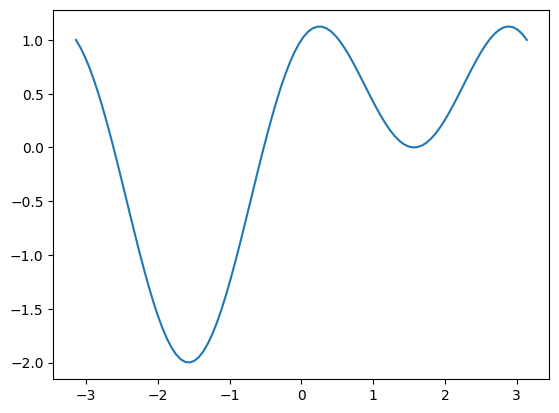

In [35]:
%matplotlib inline
from math import pi as π
from numpy import sin, cos
import matplotlib.pyplot as plt

x = np.linspace(-π, π, 100)
y = sin(x) + cos(2*x)
plt.plot(x, y);

## Short exercise (creating ranges)

* Create an array of 400 64-bit floating point values between 0 and 2π (e.g. radians, perhaps).
* Create an array where each row represents a different quadrant of a full 360° rotation.  Each row should contain 100 data points as radians.
* Extra Credit: Create an array where each *column* represents a different quadrant of a full 360° rotation.

In [ ]:
# Array of radians
arr_rad = ...

# 2-D array of quadrants
arr_quads = ...

## Diagonal arrays:  `np.eye` and `np.diag`

`np.eye(N)` produces an array with shape (N,N) and ones on the diagonal (an N×N identity matrix). `np.diag()` produces a diagonal 2D array from an array argument (or any iterable). `np.diag()` is its own inverse as well.

In [36]:
print("Identity matrix:")
print(np.eye(3))

Identity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [37]:
print("Diagonal matrix:")
print(np.diag([3, 2, 1]))

Diagonal matrix:
[[3 0 0]
 [0 2 0]
 [0 0 1]]


In [38]:
# diagonal of an identity matrix ...
np.diag(np.eye(3))

array([1., 1., 1.])

## Arrays from Random Distributions

It is common to create arrays whose elements are samples from a random distribution.  For the many options, see:

  * help(np.random) 
  * [NumPy Random](https://docs.scipy.org/doc/numpy/reference/random/index.html)

In [39]:
print("Uniform on [0,1):")
np.random.random((2, 5))

Uniform on [0,1):


array([[0.21580194, 0.23911828, 0.70360158, 0.19052266, 0.09714052],
       [0.88896855, 0.15513299, 0.06258165, 0.84087042, 0.4423069 ]])

In [40]:
print("standard normal:")
print(np.random.standard_normal((2, 5))) # call with tuple
print("randn (equiv):")
print(np.random.randn(2, 5)) # argument per dimension

standard normal:
[[-2.2531981   0.43157519  0.03683083 -1.58060907 -0.33337046]
 [ 0.06114229 -1.20589757 -2.55755532  0.120245   -1.28358181]]
randn (equiv):
[[-0.50997459  1.89379073 -0.26505959  0.95962893 -0.24104732]
 [-0.39590121 -0.10807435  1.11962475  0.89424685  0.16732586]]


In [41]:
print("Uniform ints on [0,5) - upper open:")
print(np.random.randint(0, 5, (2, 5)))

Uniform ints on [0,5) - upper open:
[[0 1 0 3 1]
 [1 1 2 2 3]]


## Short exercise (random arrays)

* Assuming colors are represented by successive positive integers, create a 3×3×3 cube where each segment is a random color.
* Create a diagonal array on a 5×5 matrix where each element of the diagonal is a random "color."
* Extra Credit: Create an array of the distinct numbers from 1 to 100 in random order
* Extra Credit: Draw a 20×20 array of values from a Poisson distribution.

In [ ]:
# Colors
RED, GREEN, BLUE = 1, 2, 3

# Cube of colors
arr_colors = ...

# Diagonal of colors
arr_diag = ...